# SectionPy Module Testing Notebook
Jupyter Notebook created by **Ben Fisher** for testing and development of the StaticsPy library and for examples and explanation of the functions

## Imports

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
from math import sqrt
module_path = os.path.abspath(os.path.join("C:\\Users\\benst\\Documents\\_0 Workspace\\py\\SectionPy\\SectionPy\\section.py"))
if module_path not in sys.path:
    sys.path.append(module_path)
import section as sc
sc.__version__

'0.0.1'

## Create Arbitrary Section
Create a numpy array of ordered pairs that describes an arbitrary, simple, closed, convext polygon of *n* verticies and sides. 

**Note:** for visualization purposes, we need to append the first coordinate to the end of the array in order to show a closed polygon in Matplotlib.

In [2]:
vertices = np.array([[-1,-2],[4,-1],[6,5],[3,3],[-3,5],[1,1]])
vertices = np.vstack((vertices, vertices[0]))
vertices

array([[-1, -2],
       [ 4, -1],
       [ 6,  5],
       [ 3,  3],
       [-3,  5],
       [ 1,  1],
       [-1, -2]])

We can check the shape of the array to make sure its n x 2:

In [3]:
vertices.shape

(7, 2)

Let's slice this array and visualize it using Matplotlib.

In [4]:
xs = vertices[:,0]
ys = vertices[:,1]

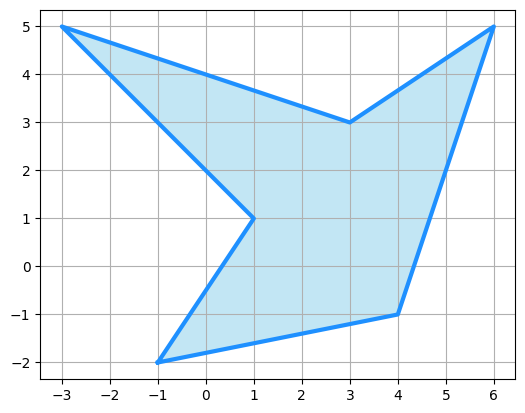

In [5]:
# First, let's create a plot
fig, ax = plt.subplots()

# Set the grid aspect ratio at 1:1 for square grids
ax.set_aspect('equal')

# Make the scale the same along both axes: 1
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))

# Show the grid
plt.grid()

# Let's put some fill inside the polygon
ax.fill(xs, ys, color="skyblue",alpha=0.5)

# Finally, let's plot the polygon
plt.plot(xs,ys,color="dodgerblue",linewidth=3)

Assuming the vertices array is n x 2. Note that this double counts the first point, but that's ok, we'll operate to n-1

In [6]:
n = vertices.shape[0]

## Calculate the Perimeter
Determine the perimeter of the polygon based on the following formula:

$ P = \displaystyle\sum_{i=0}^{n-1}\sqrt{(x_{i+1}-x_i)^2+(y_{i+1}-y_i)^2} $ 

In [7]:
P = 0
for i in range(0,n-1):
    P += sqrt((xs[i+1]-xs[i])**2+(ys[i+1]-ys[i])**2)

# Print P (the answer should be 30.616087)
P

30.616086954686658

In [8]:
sc.perimeter(vertices)

30.616086954686658

## Calculate the Area
Determine area based on the **shoelace algorithm**, use the *Trapezoid Formula* or *Triangle Formula* as follows (*both formula give the same answer*):

$ A_{trapezoid}=\dfrac{1}{2}\displaystyle\sum_{i=0}^{n-1}(y_i+y_{i+1})(x_i-x_{i+1}) $

$ A_{triangle}=\dfrac{1}{2}\displaystyle\sum_{i=0}^{n-1}(x_iy_{i+1}-x_{i+1}y_i) $

In [9]:
A = 0
for i in range(0,n-1):
    # A += (ys[i]+ys[i+1])*(xs[i]-xs[i+1])  # Trapezoid Formula
    A += (xs[i]*ys[i+1]-xs[i+1]*ys[i])    # Triangle Formula
A *= 0.5

# Print the area A (should be 26.5)
A

26.5

In [10]:
sc.area(vertices)

26.5

**TODO:** This only works if the polygon is *simple*, that means it doesn't self-intersect. Determine if need a function to perform Shamos-Hoey algorithm or Bentley-Ottmann algorithm, to determine if self-intersecting.

## Calculate the Centroids
Using an extension of the *Trapezoid Formula*, we can calculate the centroids Cx and Cy, using the area A calculated previously:

$ C_x = \displaystyle\frac{1}{6A}\sum_{i=0}^{n-1}(x_i+x_{i+1})(x_iy_{i+1}-x_{i+1}y_i) $

$ C_y = \displaystyle\frac{1}{6A}\sum_{i=0}^{n-1}(y_i+y_{i+1})(x_iy_{i+1}-x_{i+1}y_i) $

In [11]:
Cx = Cy = 0
for i in range(0,n-1):
    Cx += (xs[i]+xs[i+1])*(xs[i]*ys[i+1]-xs[i+1]*ys[i])
    Cy += (ys[i]+ys[i+1])*(xs[i]*ys[i+1]-xs[i+1]*ys[i])
Cx /= (6*A)
Cy /= (6*A)

In [12]:
# Print Cx and Cy (should be 2.075472, 1.54717, respectively)
Cx, Cy

(2.0754716981132075, 1.5471698113207548)

In [13]:
sc.centroids(vertices)

array([2.0754717 , 1.54716981])

In [14]:
sc.Cx(vertices), sc.Cy(vertices)

(2.0754716981132075, 1.5471698113207548)

## Calculate Extrema
Determine the maxima and minima of the polygon:

In [15]:
min_x = np.min(xs)
max_x = np.max(xs)
min_x, max_x

(-3, 6)

In [16]:
min_y = np.min(ys)
max_y = np.max(ys)
min_y, max_y

(-2, 5)

In [17]:
sc.extrema(vertices)

array([[-3,  6],
       [-2,  5]])

## Calculate the Second Moment of Area about Own Axis
Continuing to use the *shoelace algorithm* calculate the second moments of area (moments of inertia) of the polygon as follows:

$ I_y=\dfrac{1}{12}\displaystyle\sum_{i=0}^{n-1}(x_iy_{i+1}-x_{i+1}y_i)(x_i^2+x_ix_{i+1}+x_{i+1}^2) $

$ I_x=\dfrac{1}{12}\displaystyle\sum_{i=0}^{n-1}(x_iy_{i+1}-x_{i+1}y_i)(y_i^2+y_iy_{i+1}+y_{i+1}^2) $

Below is the formula for the product of inertia

$ I_{xy}=\dfrac{1}{24}\displaystyle\sum_{i=0}^{n-1}(x_iy_{i+1}-x_{i+1}y_i)(x_iy_{i+1}+2x_iy_i+2x_{i+1}y_{i+1}+x_{i+1}y_i) $

Finally, the polar moment of inertia is determined using the perpendicular axis theorem:

$ I_z = I_x + I_y $

In [18]:
Ix = Iy = Ixy = 0
for i in range(0,n-1):
    Ix += (xs[i]*ys[i+1]-xs[i+1]*ys[i])*(ys[i]**2+ys[i]*ys[i+1]+ys[i+1]**2)
    Iy += (xs[i]*ys[i+1]-xs[i+1]*ys[i])*(xs[i]**2+xs[i]*xs[i+1]+xs[i+1]**2)
    Ixy += (xs[i]*ys[i+1]-xs[i+1]*ys[i])*(xs[i]*ys[i+1]+2*xs[i]*ys[i]+2*xs[i+1]*ys[i+1]+xs[i+1]*ys[i])
    
Ix /= 12
Iy /= 12
Ixy /= 24

In [19]:
Ix, Iy, Ix+Iy, Ixy

(140.08333333333334, 203.41666666666666, 343.5, 83.79166666666667)

In [20]:
sc.inertias(vertices)

array([140.08333333, 203.41666667, 343.5       ,  83.79166667])

In [21]:
Ix = sc.Ix(vertices)
Iy = sc.Iy(vertices)
Ixy = sc.Ixy(vertices)
Ix, Iy, Ixy

(140.08333333333334, 203.41666666666666, 83.79166666666667)

## Moments of Inertia about Inclined Angle

In [22]:
xys = np.array([[5,0],[6,0],[6,4],[1,4],[1,7],[0,7],[0,3],[5,3]])
(xys[0][0] == xys[-1][0]) & (xys[0][1] == xys[-1][1])

False

In [23]:
xys = sc.closePolygon(xys)

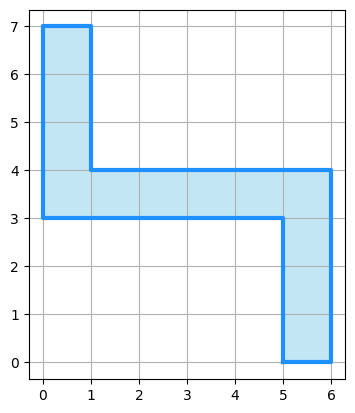

In [24]:
# First, let's create a plot
fig, ax = plt.subplots()

# Set the grid aspect ratio at 1:1 for square grids
ax.set_aspect('equal')

# Make the scale the same along both axes: 1
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))

# Show the grid
plt.grid()

# Let's put some fill inside the polygon
ax.fill(xys[:,0], xys[:,1], color="skyblue",alpha=0.5)

# Finally, let's plot the polygon
plt.plot(xys[:,0], xys[:,1],color="dodgerblue",linewidth=3)

In [25]:
A = sc.area(xys)
cgs = sc.centroids(xys)
A, cgs

(12.0, array([3. , 3.5]))

In [26]:
inerts = sc.inertias(xys)
inerts


array([176., 164., 340.,  96.])

**BUG** There appears to be a bug with this, the above answers are incorrect

## Section Modulii

In [27]:
sc.Cx(vertices), sc.Cy(vertices), sc.extrema(vertices)

(2.0754716981132075,
 1.5471698113207548,
 array([[-3,  6],
        [-2,  5]]))

In [28]:
y_top = sc.extrema(vertices)[1][1] - sc.Cy(vertices)
y_bot = sc.extrema(vertices)[1][0] - sc.Cy(vertices)
y_top, y_bot

(3.452830188679245, -3.547169811320755)

In [29]:
x_left = sc.extrema(vertices)[0][0] - sc.Cx(vertices)
x_right = sc.extrema(vertices)[0][1] - sc.Cx(vertices)
x_left, x_right

(-5.0754716981132075, 3.9245283018867925)

In [30]:
S_top = sc.Ix(vertices)/y_top
S_bot = sc.Ix(vertices)/y_bot
S_bot, S_top

(-39.4915780141844, 40.57058287795993)

In [31]:
S_left = sc.Iy(vertices)/x_left
S_right = sc.Iy(vertices)/x_right
S_left, S_right

(-40.078376703841386, 51.83213141025641)

In [32]:
sc.sectionModulii(vertices)

[-39.4915780141844, 40.57058287795993, -40.078376703841386, 51.83213141025641]

## Calculate the radii of gyration

$ r = \displaystyle\sqrt{\frac{I}{A}} $

In [33]:
rx = sqrt(Ix/A)
ry = sqrt(Iy/A)
rx, ry

(3.416666666666667, 4.117206442345209)

In [34]:
radii = sc.radii(vertices)
radii

array([2.29916583, 2.77057767])

In [35]:
sc.rx(vertices), sc.ry(vertices)

(2.2991658317773815, 2.7705776706186778)

Let's replot the shape, but put plot the centroid on the shape.

Text(0, 10, 'Centroid')

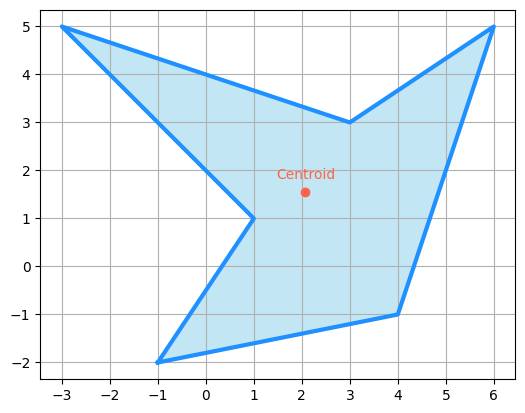

In [36]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
plt.grid()
ax.fill(xs, ys, color="skyblue",alpha=0.5)
plt.plot(xs,ys,color="dodgerblue",linewidth=3)

plt.scatter(sc.Cx(vertices), sc.Cy(vertices),color="tomato",marker="o",zorder=2)

plt.annotate("Centroid",                             # the actual label
                 (sc.Cx(vertices), sc.Cy(vertices)), # these are the coordinates to position the label
                 textcoords="offset points",         # how to position the text
                 xytext=(0,10),                      # distance from text to points (x,y)
                 ha='center',                        # horizontal alignment can be left, right or center
                 color="tomato")                        

# Line Intersection Functions
**TODO List**
1. Linear interpolation
2. Bezier parameters, *t* and *u*, to test intersection
3. Multilinear interpolation - provide table of numbers and interpolate between the appropriate ordinates
4. Bilinear interpolation
   

### Define to lines from four coordinates

In [37]:
line1 = np.array([[0,2],[3,-4]])
line2 = np.array([[-5,7],[1,3]])

In [38]:
line1

array([[ 0,  2],
       [ 3, -4]])

In [39]:
line2

array([[-5,  7],
       [ 1,  3]])

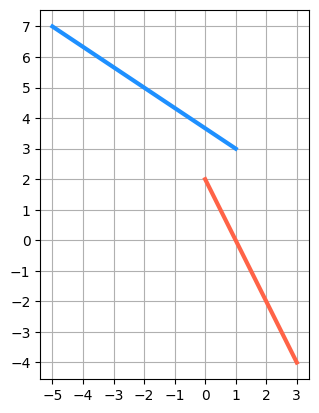

In [40]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
plt.grid()
plt.plot(line1[:,0], line1[:,1],color="tomato",linewidth=3)
plt.plot(line2[:,0], line2[:,1],color="dodgerblue",linewidth=3)

Test creating a determinant using the points for line1, while setting y = 1.

In [41]:
arr1 = line1.copy()
arr1[:,1]=1
arr1

array([[0, 1],
       [3, 1]])

Calculate the determinant of arr1

In [42]:
np.linalg.det(arr1)

-3.0000000000000004

Calculate the point x,y where the two lines would intersect (if they do). This can be done as follows.

$ x_0 = \displaystyle\frac{\begin{vmatrix}\begin{vmatrix}x_1&y_1\\x_2&y_2\end{vmatrix}&\begin{vmatrix}x_1&1\\x_2&1\end{vmatrix}\\\begin{vmatrix}x_3&y_3\\x_4&y_4\end{vmatrix}&\begin{vmatrix}x_3&1\\x_4&1\end{vmatrix}\end{vmatrix}}{{\begin{vmatrix}\begin{vmatrix}x_1&1\\x_2&1\end{vmatrix}&\begin{vmatrix}y_1&1\\y_2&1\end{vmatrix}\\\begin{vmatrix}x_3&1\\x_4&1\end{vmatrix}&\begin{vmatrix}y_3&1\\y_4&1\end{vmatrix}\end{vmatrix}}} $

$ y_0 = \displaystyle\frac{\begin{vmatrix}\begin{vmatrix}x_1&y_1\\x_2&y_2\end{vmatrix}&\begin{vmatrix}y_1&1\\y_2&1\end{vmatrix}\\\begin{vmatrix}x_3&y_3\\x_4&y_4\end{vmatrix}&\begin{vmatrix}y_3&1\\y_4&1\end{vmatrix}\end{vmatrix}}{{\begin{vmatrix}\begin{vmatrix}x_1&1\\x_2&1\end{vmatrix}&\begin{vmatrix}y_1&1\\y_2&1\end{vmatrix}\\\begin{vmatrix}x_3&1\\x_4&1\end{vmatrix}&\begin{vmatrix}y_3&1\\y_4&1\end{vmatrix}\end{vmatrix}}} $

Notice that the demoninators are the same for both equations.

In [43]:
# Form the two "x and 1" determinates
x11 = line1.copy()
x21 = line2.copy()
x11[:,1]=1
x21[:,1]=1
x11, x21

(array([[0, 1],
        [3, 1]]),
 array([[-5,  1],
        [ 1,  1]]))

In [44]:
# Form the two "y and 1" determinates
y11 = line1.copy()
y21 = line2.copy()
y11

array([[ 0,  2],
       [ 3, -4]])

In [45]:
y21

array([[-5,  7],
       [ 1,  3]])

In [46]:
# Swap the rows
y11[:,[0,1]] = y11[:,[1,0]]
y11

array([[ 2,  0],
       [-4,  3]])

In [47]:
y11[:,1]=1
y11

array([[ 2,  1],
       [-4,  1]])

In [48]:
y21[:,[0,1]] = y21[:,[1,0]]
y21[:,1]=1
y21

array([[7, 1],
       [3, 1]])

In [49]:
denom_det = np.linalg.det(np.array([[np.linalg.det(x11),np.linalg.det(y11)],[np.linalg.det(x21),np.linalg.det(y21)]]))
denom_det

23.999999999999993

In [50]:
numer_det_x = np.linalg.det(np.array([[np.linalg.det(line1),np.linalg.det(x11)],[np.linalg.det(line2),np.linalg.det(x21)]]))
x0 = numer_det_x / denom_det
x0

-1.2500000000000009

In [51]:
numer_det_y = np.linalg.det(np.array([[np.linalg.det(line1),np.linalg.det(y11)],[np.linalg.det(line2),np.linalg.det(y21)]]))
y0 = numer_det_y / denom_det
y0

4.500000000000003

In [52]:
sc.intersection(line1,line2)

array([-1.25,  4.5 ])

In [53]:
sc.x0(line1,line2)

-1.2500000000000009

In [54]:
sc.y0(line1,line2)

4.500000000000003

### First Degree Bezier Parameters
Use first degree Bezier parameters to determine if two lines intersect.
https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection

In [55]:
sc.bezierParams(line1, line2)

(-0.41666666666666674, 1.6666666666666663)

In [56]:
sc.doLinesIntersect(line1,line2)

True

In [57]:
sc.doSegmentsIntersect(line1,line2)

(False, False)

In [58]:
lineA = np.array([[0,0],[1,1]])
lineB = np.array([[0,1],[1,0]])
sc.bezierParams(lineA,lineB)

(0.5, 0.5)

In [59]:
sc.doSegmentsIntersect(lineA,lineB)

(True, True)